In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

import utils 

DATA_PATH = './data/raw_data'

In [47]:
def load_data(file_name):
    return pd.read_csv(os.path.join(DATA_PATH, file_name + '.csv'))

In [10]:
# dataset 1
seds = pd.read_csv(os.path.join(DATA_PATH, 'seds.csv'))

In [12]:
seds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711736 entries, 0 to 1711735
Data columns (total 8 columns):
year           int64
msn            object
state_name     object
state_code     object
description    object
energy_bin     object
value          float64
unit           object
dtypes: float64(1), int64(1), object(6)
memory usage: 104.5+ MB


In [15]:
seds.unit.unique()

array(['Billion Btu', 'Thousand barrels', 'Dollars per million Btu',
       'Million dollars', 'Million Btu per short ton',
       'Thousand short tons', 'Million Btu per barrel',
       'Million kilowatthours', 'Million chained (2009) dollars',
       'Dollars', 'Million cubic feet', 'Thousand Btu per cubic foot',
       'Thousand Btu per cubic feet', 'Million Btu', 'Percent',
       'Thousand Btu per chained (2009) dollar', 'Thousand',
       'Thousand cords', 'Thousand Btu per kilowatthour'], dtype=object)

# Energy Workforce Training (DS 4)

In [26]:
energy_workforce_training = pd.read_csv(os.path.join(DATA_PATH, 'energy_workforce_training.csv'))

In [28]:
ewt = energy_workforce_training
ewt.sub

,lead_grantee,state_code,project_title,certificate,topic,sub_topic
0,Texas State Technical College Waco,TX,Development of an Advanced Technical Certifica...,Advanced Vehicle Systems Certificate,Energy Efficiency,Vehicles
1,Lansing Community College,MI,Integrated Career and Educational Pathways in ...,Building Science Energy Management,Energy Efficiency,Buildings
2,J Sargeant Reynolds Community College,VA,Advanced Vehicle Control Systems,Advanced Vehicle Control Systems,Energy Efficiency,Vehicles
3,Brevard Community College,FL,Distributed Energy Systems Curricula for the D...,Distributed Energy Technology,Energy Efficiency,General
4,Butte-Glenn Community College District,CA,Green Building Systems,Green Building Inspectors,Energy Efficiency,Buildings
5,Butte-Glenn Community College District,CA,Green Building Systems,Sustainable Energy Auditors,Energy Efficiency,Sustainability
6,Fulton-Montgomery Community College,NY,Technological Education Pathways Partnership (...,Electrical Technology,Energy Efficiency,Electronics
7,Brevard Community College,FL,Creating An Energy Systems Technology Technici...,Alternative Energy Systems Technology,Energy Efficiency,General
8,Santa Fe Community College,NM,Collaborative Research: SIMBUILDING: TEACHING ...,Building Simulations,Energy Efficiency,Buildings
9,Concord Consortium,MA,Collaborative Research: SIMBUILDING: TEACHING ...,Building Simulations,Energy Efficiency,Buildings


In [30]:
ewt.topic.unique()

array(['Energy Efficiency', 'Electricity', 'Fossil Fuel Energy',
       'General', 'Manufacturing', 'Nuclear', 'Renewable Energy', nan],
      dtype=object)

In [41]:
states = ewt.state_code.unique()
train_prog = {}
for state in states:
    df = ewt[ewt.state_code == state]
    df = df[["state_code", "topic"]]
    series = df['topic'].value_counts()/len(df) 
    train_prog[state] = series
    print(state, series)
    

TX Manufacturing        0.588235
Energy Efficiency    0.176471
Renewable Energy     0.176471
Nuclear              0.058824
Name: topic, dtype: float64
MI Manufacturing        0.652174
Energy Efficiency    0.239130
Renewable Energy     0.086957
Electricity          0.021739
Name: topic, dtype: float64
VA Manufacturing        0.428571
Energy Efficiency    0.285714
Nuclear              0.285714
Name: topic, dtype: float64
FL Manufacturing        0.56250
Renewable Energy     0.21875
Energy Efficiency    0.12500
Nuclear              0.09375
Name: topic, dtype: float64
CA Manufacturing        0.585714
Renewable Energy     0.242857
Energy Efficiency    0.157143
Electricity          0.014286
Name: topic, dtype: float64
NY Manufacturing        0.866667
Energy Efficiency    0.066667
Renewable Energy     0.066667
Name: topic, dtype: float64
NM Manufacturing        0.666667
Energy Efficiency    0.222222
Renewable Energy     0.111111
Name: topic, dtype: float64
MA Manufacturing        0.631579
Rene

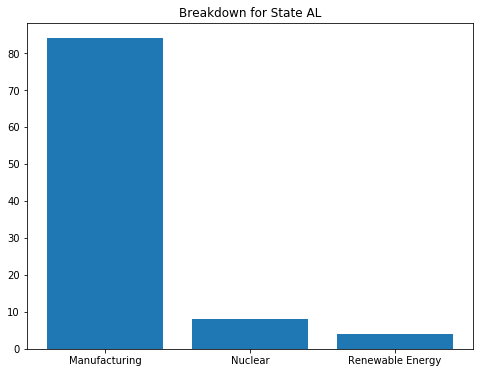

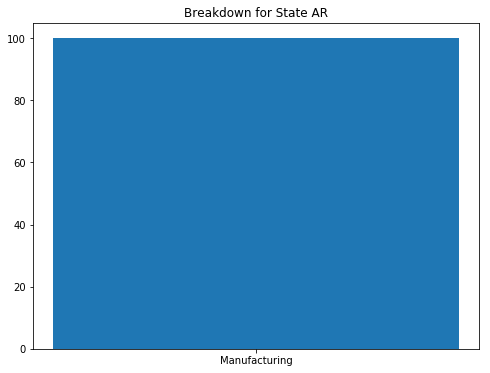

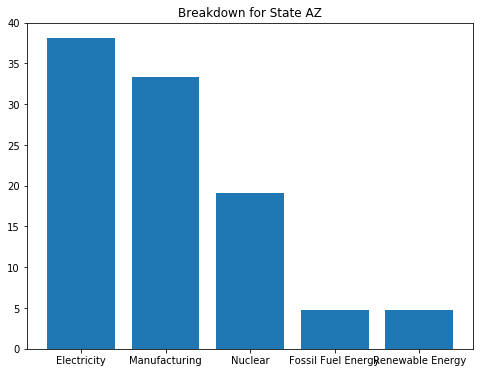

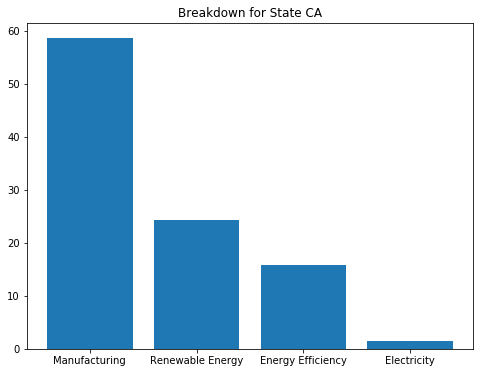

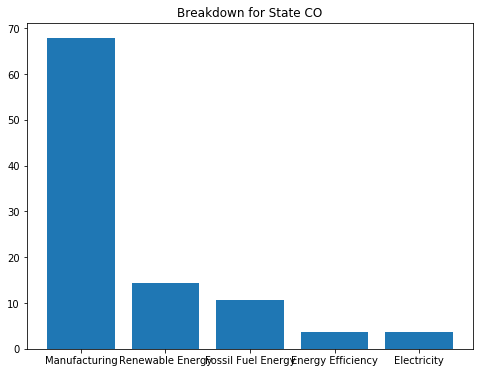

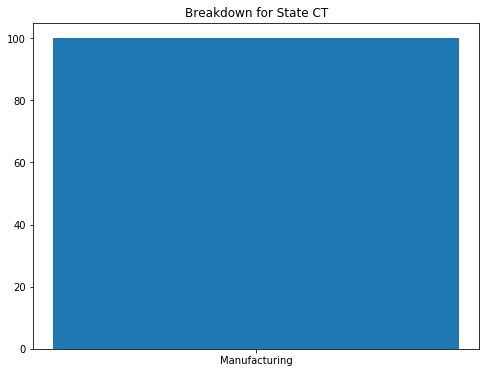

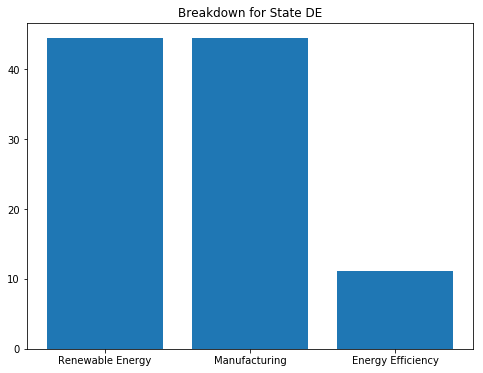

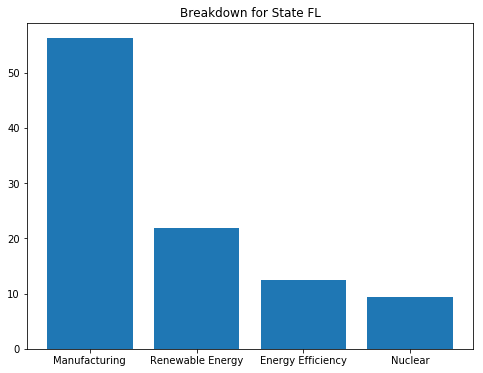

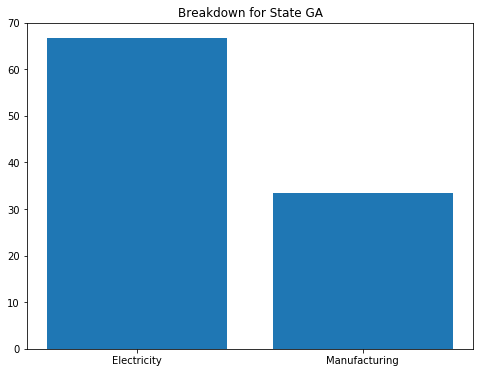

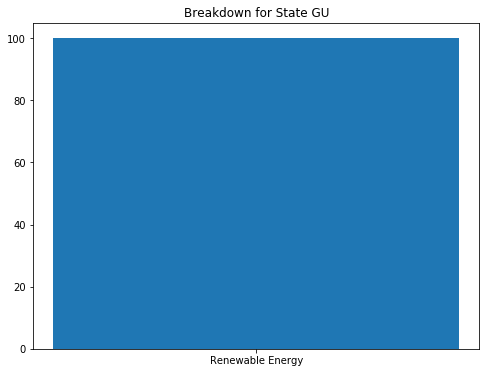

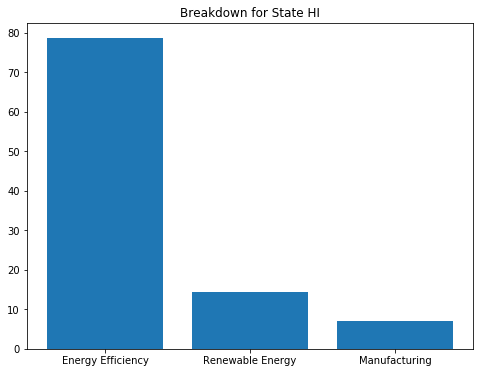

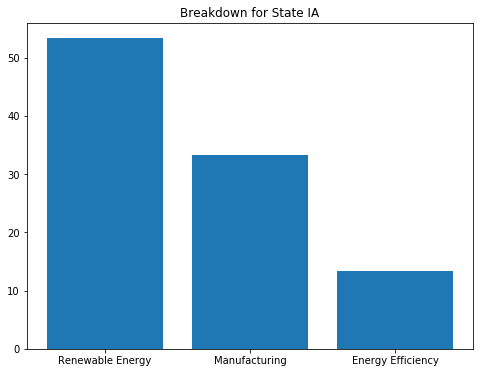

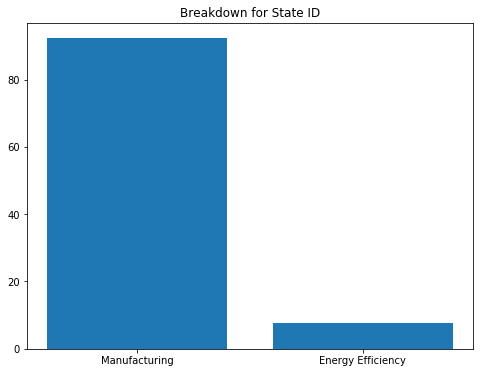

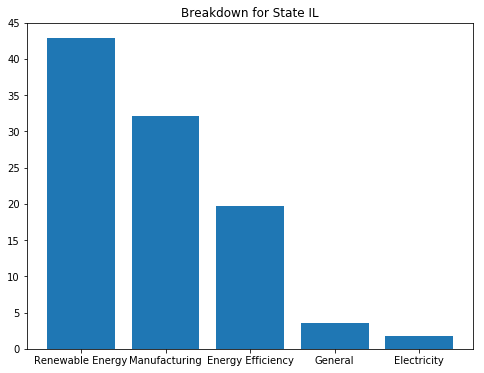

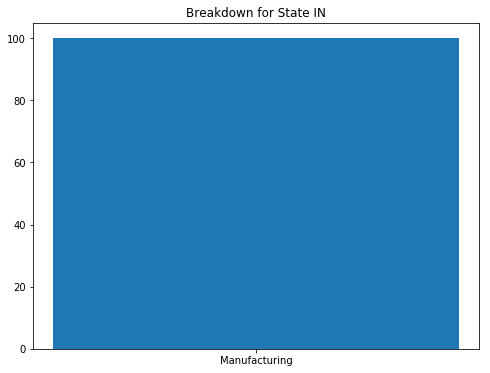

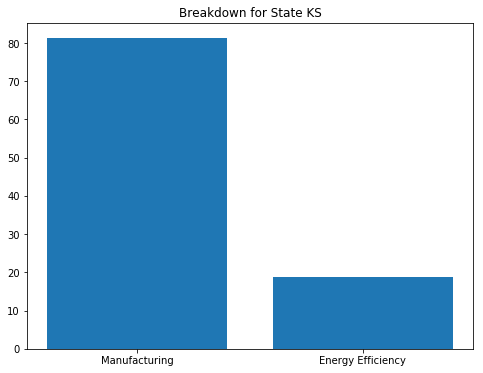

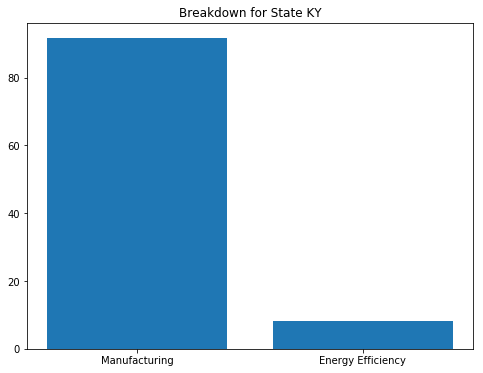

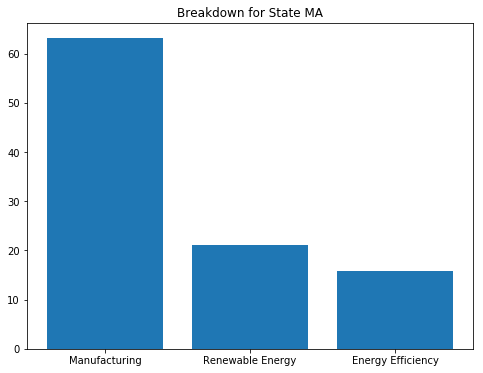

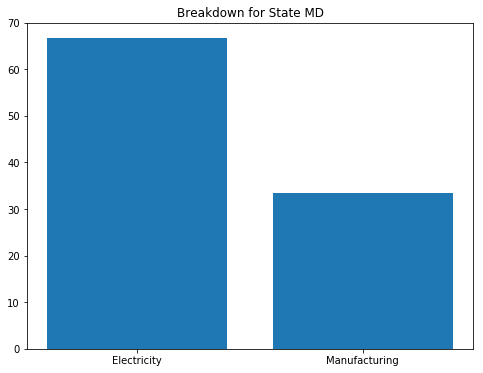

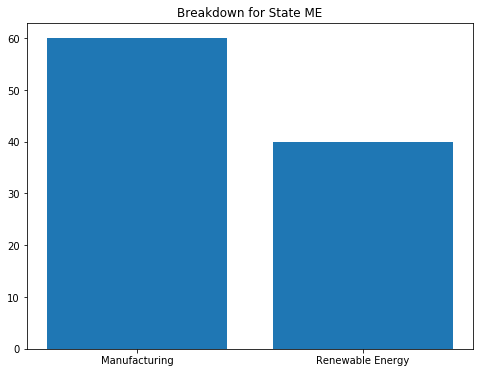

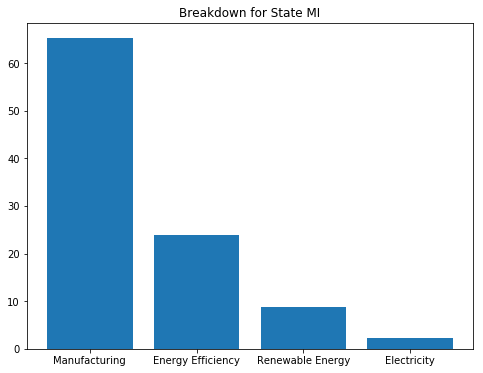

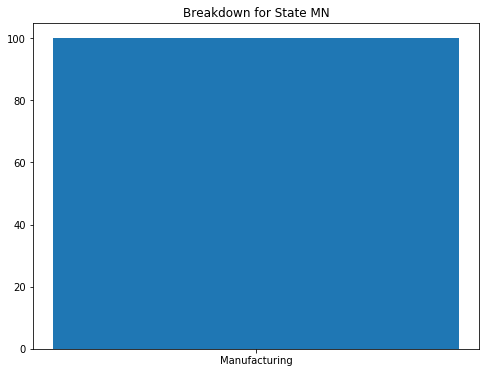

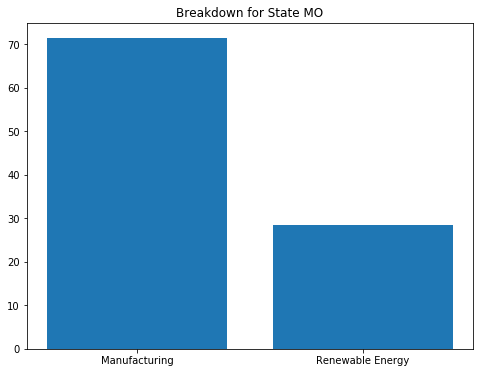

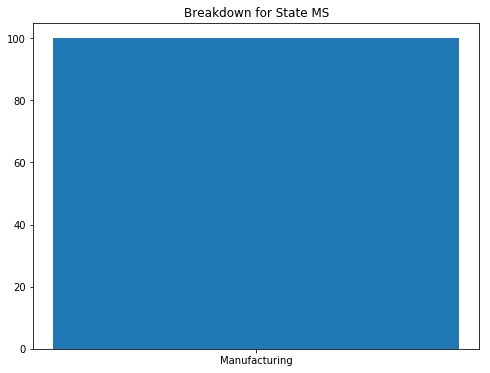

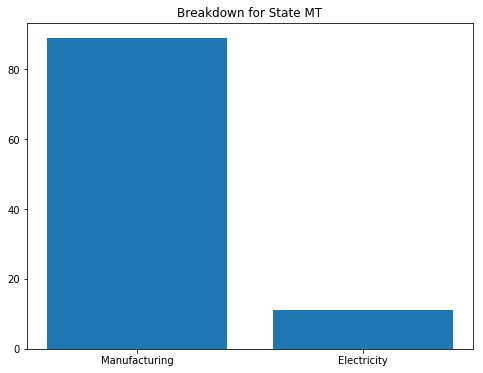

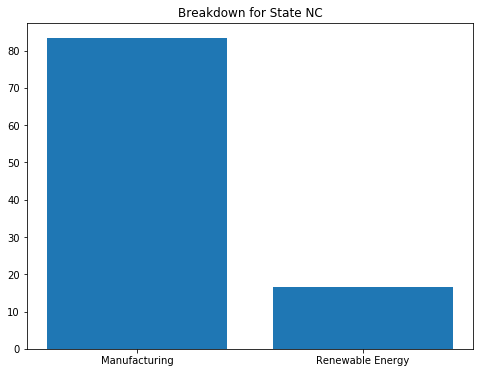

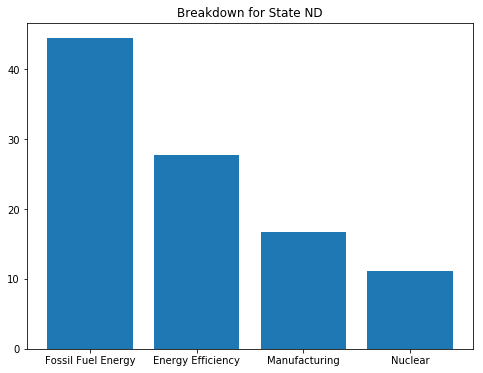

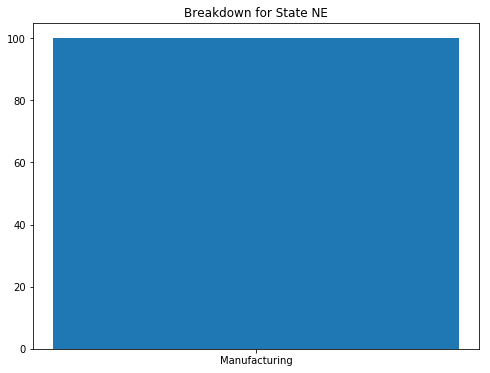

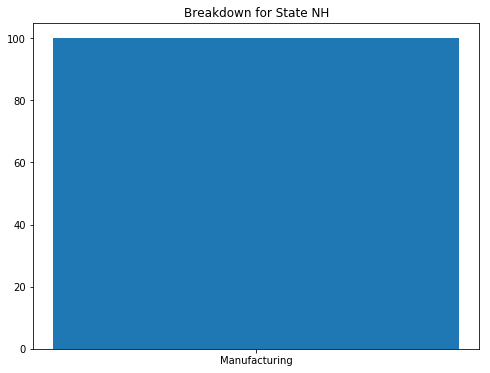

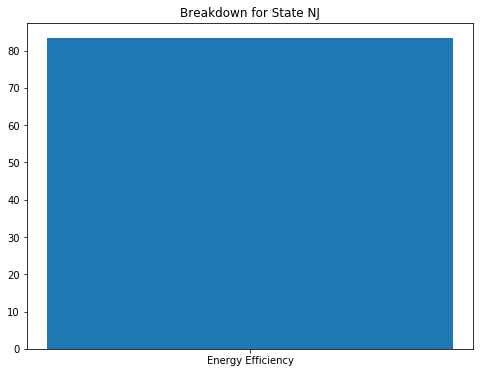

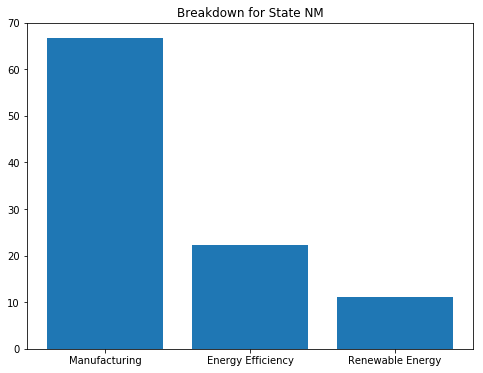

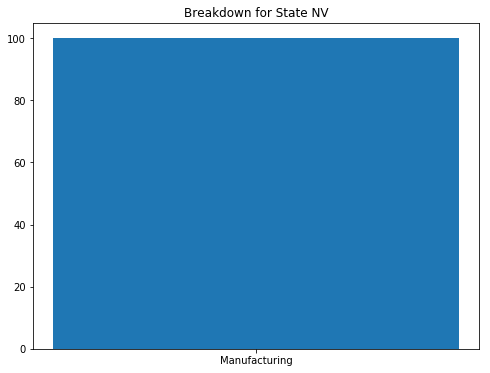

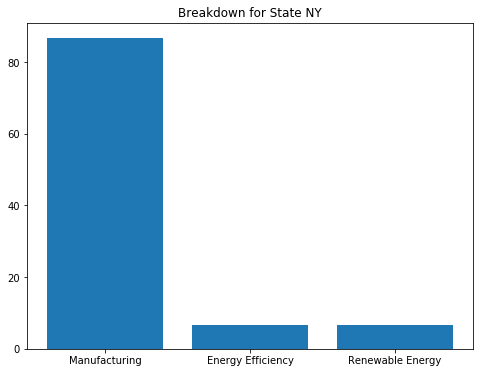

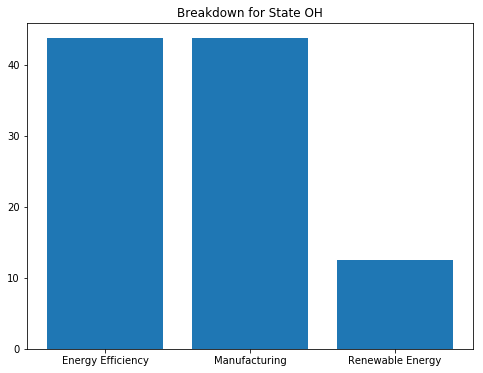

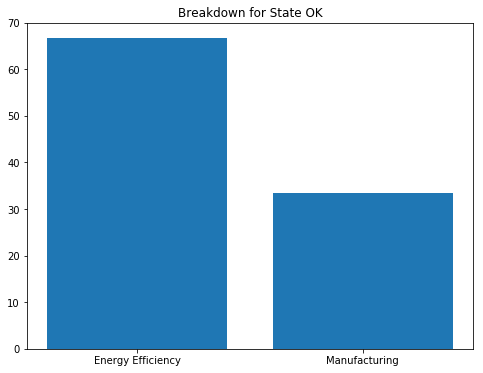

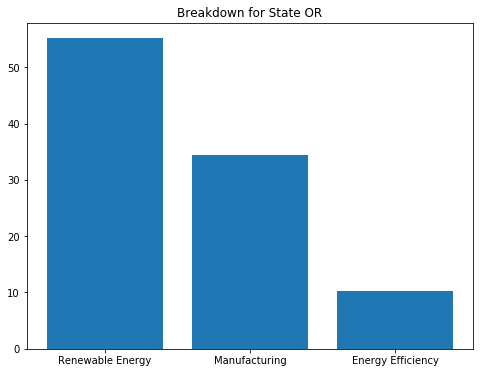

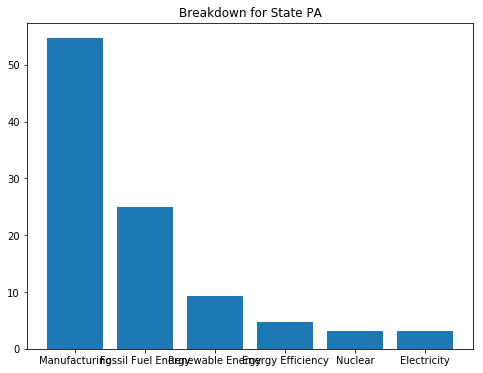

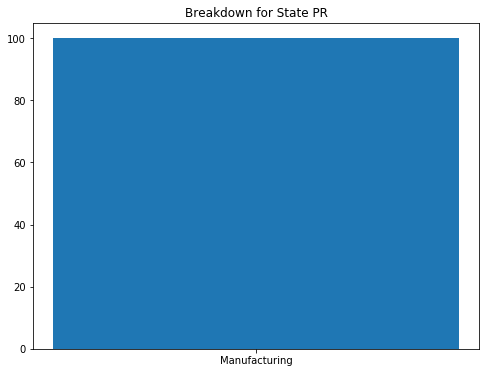

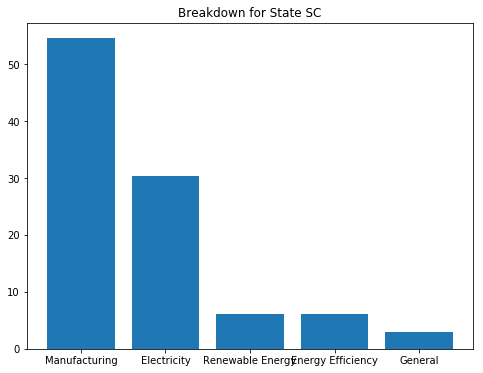

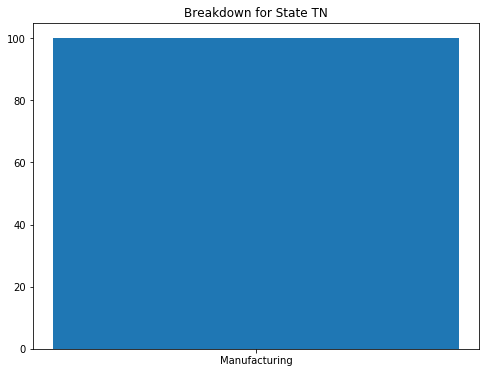

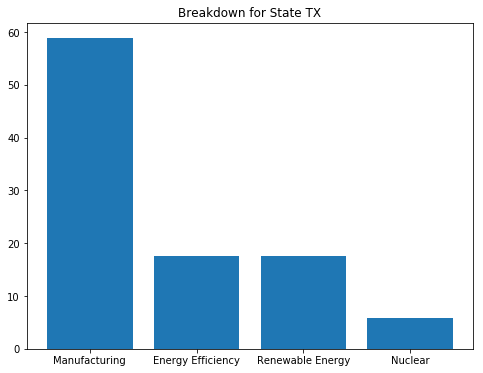

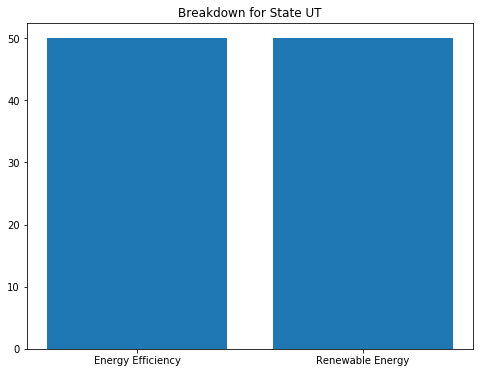

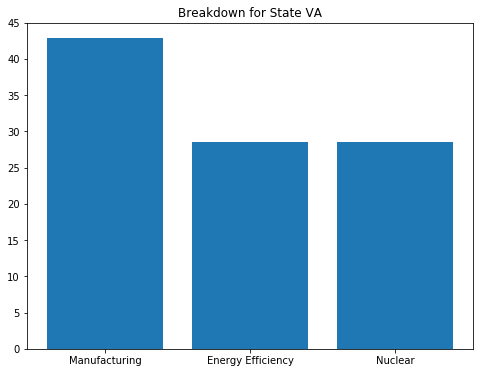

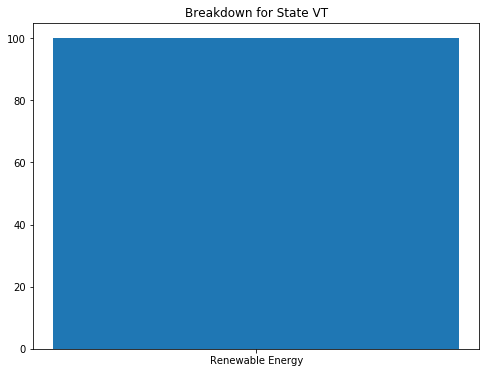

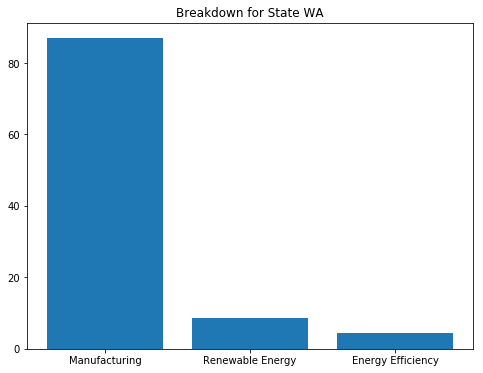

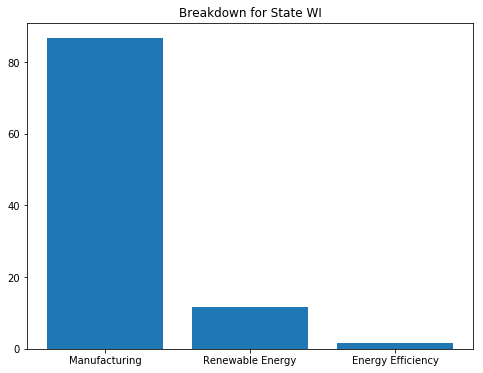

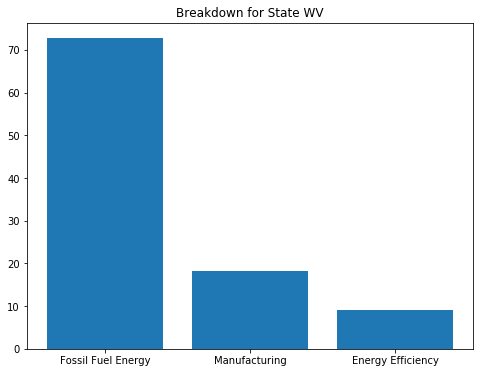

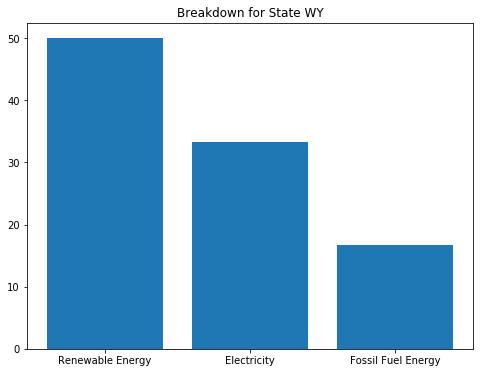

In [46]:
for state in sorted(train_prog.keys()):
    plt.figure(figsize=(8,6))
    df = train_prog[state]
    plt.bar(df.keys(), df*100)
    plt.title('Breakdown for State {}'.format(state))
    plt.show()

In [54]:
key_states = []
for state in states:
    df = train_prog[state]
    if df.argmax() != 'Manufacturing':
        key_states.append((state, df.argmax()))
print(key_states)

[('OK', 'Energy Efficiency'), ('IA', 'Renewable Energy'), ('OH', 'Energy Efficiency'), ('DE', 'Renewable Energy'), ('IL', 'Renewable Energy'), ('UT', 'Energy Efficiency'), ('OR', 'Renewable Energy'), ('HI', 'Energy Efficiency'), ('NJ', 'Energy Efficiency'), ('WV', 'Fossil Fuel Energy'), ('ND', 'Fossil Fuel Energy'), ('WY', 'Renewable Energy'), ('GA', 'Electricity'), ('MD', 'Electricity'), ('AZ', 'Electricity'), ('GU', 'Renewable Energy'), ('VT', 'Renewable Energy')]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


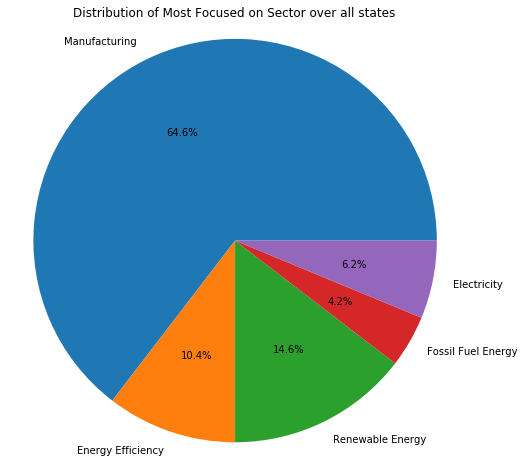

In [100]:
from collections import defaultdict
sectors = defaultdict(int) 
for state in states:
    df = train_prog[state]
    sectors[df.argmax()] += 1
sectors_df = pd.Series(sectors)

plt.figure(figsize=(8,8))
plt.pie(sectors_df, labels=sectors_df.index, autopct='%1.1f%%')
plt.title("Distribution of Most Focused on Sector over all states")
plt.axis('equal')
plt.show()

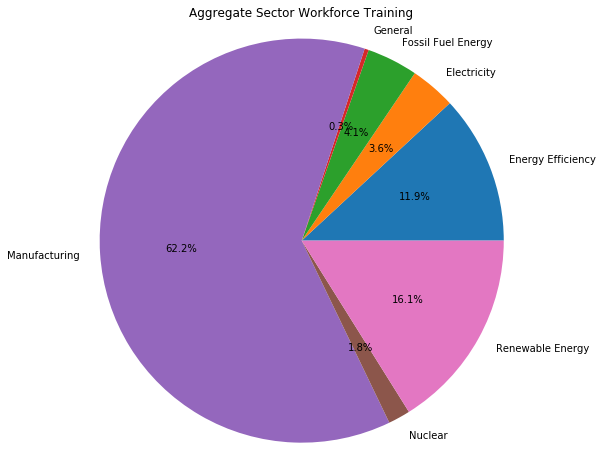

In [99]:
all_sectors = defaultdict(int) 
tot_sect = ewt.topic.dropna()

for x in tot_sect:
    all_sectors[x] += 1
    
all_sectors_df = pd.Series(all_sectors)
    
plt.figure(figsize = (8,8))
plt.pie(all_sectors_df, labels=all_sectors_df.index, autopct='%1.1f%%')
plt.title("Aggregate Sector Workforce Training")
plt.axis('equal')
plt.show()

# Air Concentrations (DS 3)

In [101]:
air_concentrations = load_data("air_concentrations")

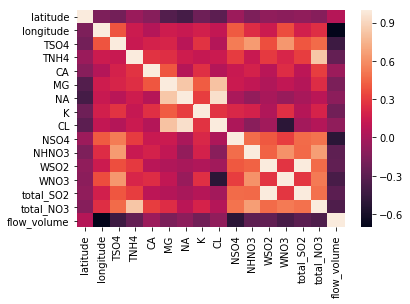

In [105]:
ac = air_concentrations
sns.heatmap(ac.corr())

In [106]:
ac

,latitude,longitude,state_code,county,date_on,date_off,TSO4,TNH4,CA,MG,NA,K,CL,NSO4,NHNO3,WSO2,WNO3,total_SO2,total_NO3,flow_volume
0,39.988309,-79.251573,PA,Somerset,01/03/2000 16:37:00,01/10/2000 16:03:00,2.3406,0.7764,0.1267,0.0144,0.1740,0.0536,NaN,0.4753,1.1347,10.2084,0.5588,10.5254,1.8930,14.9233
1,39.988309,-79.251573,PA,Somerset,01/10/2000 16:09:00,01/17/2000 19:57:00,1.7681,0.9436,0.2127,0.0272,0.1700,0.0452,NaN,1.2391,1.3881,16.4770,0.4621,17.3035,2.3097,14.9819
2,39.988309,-79.251573,PA,Somerset,01/17/2000 20:07:00,01/24/2000 21:00:00,3.7462,0.9171,0.1410,0.0220,0.1805,0.0534,NaN,1.5380,3.2918,31.8606,0.8644,32.8865,4.1565,14.5267
3,39.988309,-79.251573,PA,Somerset,01/24/2000 21:11:00,01/31/2000 16:33:00,3.6490,1.4580,0.1359,0.0217,0.3100,0.0534,NaN,1.9024,3.1171,26.0389,1.0820,27.3078,4.5255,13.8887
4,39.988309,-79.251573,PA,Somerset,01/31/2000 16:40:00,02/07/2000 16:06:00,3.8717,0.8672,0.0944,0.0146,0.1143,0.0391,NaN,2.3108,4.8706,28.7423,0.7741,30.2836,5.6604,14.6524
5,39.988309,-79.251573,PA,Somerset,02/07/2000 16:13:00,02/14/2000 15:54:00,3.6123,2.0644,0.1843,0.0166,0.1764,0.0530,NaN,0.6075,1.7146,10.8365,0.8689,11.2417,3.7518,14.7108
6,39.988309,-79.251573,PA,Somerset,02/14/2000 16:09:00,02/21/2000 17:21:00,4.2766,0.1983,0.0905,0.0113,0.1893,0.0317,NaN,0.5466,3.2664,14.0210,0.5445,14.3856,3.4128,14.9184
7,39.988309,-79.251573,PA,Somerset,02/21/2000 17:26:00,02/28/2000 17:49:00,4.5536,0.4963,0.1601,0.0325,0.2710,0.0665,NaN,0.4449,1.9788,7.3602,0.5674,7.6570,2.4436,15.2518
8,39.988309,-79.251573,PA,Somerset,02/28/2000 17:53:00,03/06/2000 16:09:00,1.7081,0.7916,0.2800,0.0398,0.1310,0.0397,NaN,0.3201,1.7845,11.0285,0.5497,11.2420,2.5478,15.0110
9,39.988309,-79.251573,PA,Somerset,03/06/2000 16:20:00,03/13/2000 15:34:00,4.5904,1.0173,0.4156,0.0502,0.0750,0.0727,NaN,0.5029,2.5205,15.5527,0.7025,15.8882,3.4977,15.1946


In [108]:
ac.columns

Index(['latitude', 'longitude', 'state_code', 'county', 'date_on', 'date_off',
       'TSO4', 'TNH4', 'CA', 'MG', 'NA', 'K', 'CL', 'NSO4', 'NHNO3', 'WSO2',
       'WNO3', 'total_SO2', 'total_NO3', 'flow_volume'],
      dtype='object')

In [109]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84900 entries, 0 to 84899
Data columns (total 20 columns):
latitude       84900 non-null float64
longitude      84900 non-null float64
state_code     84900 non-null object
county         82783 non-null object
date_on        84900 non-null object
date_off       84900 non-null object
TSO4           82378 non-null float64
TNH4           82377 non-null float64
CA             82296 non-null float64
MG             82298 non-null float64
NA             82294 non-null float64
K              82210 non-null float64
CL             67363 non-null float64
NSO4           82388 non-null float64
NHNO3          82388 non-null float64
WSO2           82378 non-null float64
WNO3           8920 non-null float64
total_SO2      82369 non-null float64
total_NO3      82380 non-null float64
flow_volume    82861 non-null float64
dtypes: float64(16), object(4)
memory usage: 13.0+ MB


In [111]:
ac = ac[["state_code", 'TSO4', 'TNH4', 'CA', 'MG', 'NA', 'K', 'CL', 'total_SO2', 'total_NO3']]

In [115]:
ac = ac.groupby("state_code").mean()
ac

,TSO4,TNH4,CA,MG,NA,K,CL,total_SO2,total_NO3
state_code,,,,,,,,,
AK,0.350534,0.066066,0.027633,0.010394,0.039238,0.017891,0.039209,0.398538,0.147934
AL,3.296170,1.141832,0.225726,0.044459,0.165003,0.096299,0.078407,2.869476,2.367901
AR,2.608408,0.435668,0.185562,0.042364,0.185749,0.094304,0.058702,0.978580,1.370016
AZ,0.736409,0.288511,0.224549,0.029806,0.087979,0.038197,0.040155,0.471496,0.907421
CA,0.862321,0.755054,0.176157,0.046941,0.216580,0.061536,0.107962,0.449072,1.880534
CO,0.516053,0.191365,0.140356,0.017996,0.029972,0.026486,0.015885,0.282822,0.635801
CT,2.028794,0.751269,0.093000,0.040347,0.274199,0.058766,0.170824,2.285194,1.943604
FL,2.486458,1.048598,0.282036,0.211841,1.559373,0.128370,2.294524,0.955567,1.518486
GA,3.093176,0.424603,0.142171,0.042179,0.211168,0.085047,0.076714,3.001278,1.735079


In [131]:
target_states = []
for chem in ac.columns:
    df = ac.sort_values(chem, ascending=False)[chem].head(2)
    target_states.append(df.index)
    print(df)

state_code
OH    3.626375
KY    3.356421
Name: TSO4, dtype: float64
state_code
IL    2.278578
IN    2.119630
Name: TNH4, dtype: float64
state_code
KS    1.503214
IN    0.671340
Name: CA, dtype: float64
state_code
VI    0.397612
FL    0.211841
Name: MG, dtype: float64
state_code
VI    2.886257
FL    1.559373
Name: NA, dtype: float64
state_code
VI    0.17353
FL    0.12837
Name: K, dtype: float64
state_code
FL    2.294524
HI    0.292058
Name: CL, dtype: float64
state_code
HI    28.869146
OH     6.801092
Name: total_SO2, dtype: float64
state_code
IN    3.580734
IL    3.498340
Name: total_NO3, dtype: float64


In [132]:
target_states

[Index(['OH', 'KY'], dtype='object', name='state_code'),
 Index(['IL', 'IN'], dtype='object', name='state_code'),
 Index(['KS', 'IN'], dtype='object', name='state_code'),
 Index(['VI', 'FL'], dtype='object', name='state_code'),
 Index(['VI', 'FL'], dtype='object', name='state_code'),
 Index(['VI', 'FL'], dtype='object', name='state_code'),
 Index(['FL', 'HI'], dtype='object', name='state_code'),
 Index(['HI', 'OH'], dtype='object', name='state_code'),
 Index(['IN', 'IL'], dtype='object', name='state_code')]

In [133]:
city_temp = load_data('land_temp_by_city')

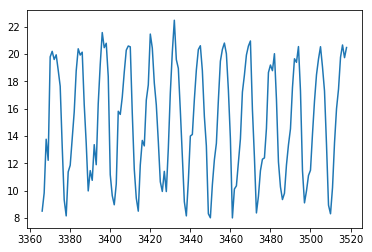

In [140]:
plt.plot(city_temp[city_temp.city == 'Berkeley'].avg_temperature)

# Vehicles (DS 5)

In [48]:
vehicles = load_data('vehicles')

In [49]:
vehicles

,petrol_consump,petrol_consump_alt,city_mileage,city_mileage_alt,city_electricity,co2,co2_alt,fuel_cost,fuel_cost_alt,fuel_type,fuel_type_alt,make,model,vehicle_class,year,you_saved_spend
0,15.695714,0.0,0.0,0.0,0.0,NaN,NaN,1600.0,0.0,Regular Gasoline,NaN,Alfa Romeo,Spider Veloce 2000,Two Seaters,1960,-1750.0
1,29.964545,0.0,0.0,0.0,0.0,NaN,NaN,3050.0,0.0,Regular Gasoline,NaN,Ferrari,Testarossa,Two Seaters,1961,-9000.0
2,12.207778,0.0,0.0,0.0,0.0,NaN,NaN,1250.0,0.0,Regular Gasoline,NaN,Dodge,Charger,Subcompact Cars,1962,0.0
3,29.964545,0.0,0.0,0.0,0.0,NaN,NaN,3050.0,0.0,Regular Gasoline,NaN,Dodge,B150/B250 Wagon 2WD,Vans,1963,-9000.0
4,17.347895,0.0,0.0,0.0,0.0,NaN,NaN,2300.0,0.0,Premium Gasoline,NaN,Subaru,Legacy AWD Turbo,Compact Cars,1964,-5250.0
5,14.982273,0.0,0.0,0.0,0.0,NaN,NaN,1550.0,0.0,Regular Gasoline,NaN,Subaru,Loyale,Compact Cars,1965,-1500.0
6,13.184400,0.0,0.0,0.0,0.0,NaN,NaN,1350.0,0.0,Regular Gasoline,NaN,Subaru,Loyale,Compact Cars,1966,-500.0
7,13.733750,0.0,0.0,0.0,0.0,NaN,NaN,1400.0,0.0,Regular Gasoline,NaN,Toyota,Corolla,Compact Cars,1967,-750.0
8,12.677308,0.0,0.0,0.0,0.0,NaN,NaN,1300.0,0.0,Regular Gasoline,NaN,Toyota,Corolla,Compact Cars,1968,-250.0
9,13.184400,0.0,0.0,0.0,0.0,NaN,NaN,1350.0,0.0,Regular Gasoline,NaN,Toyota,Corolla,Compact Cars,1969,-500.0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


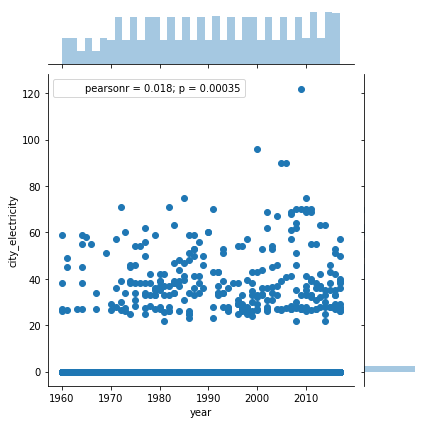

In [51]:
sns.jointplot('year', 'city_electricity', vehicles)

# SEDS

In [176]:
seds = load_data('seds')

In [142]:
seds

,year,msn,state_name,state_code,description,energy_bin,value,unit
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
5,1965,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
6,1966,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
7,1967,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
8,1968,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
9,1969,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu


In [143]:
seds.energy_bin.unique()

array(['Petroleum', 'Renewable', 'Natural Gas', 'Coal', 'Electricity',
       'Aggregate', 'Nuclear'], dtype=object)

In [146]:
nonrenew = ['Petroleum', 'Natural Gas', 'Coal']
renew = ['Renewable', 'Nuclear'] # Include Electricity? 

In [148]:
seds.columns

Index(['year', 'msn', 'state_name', 'state_code', 'description', 'energy_bin',
       'value', 'unit'],
      dtype='object')

In [149]:
seds = seds[['year', 'state_code', 'energy_bin', 'value', 'unit']]

In [160]:
seds = seds[seds.state_code != 'X3']

In [162]:
seds.sample(20)

,year,state_code,energy_bin,value,unit
1014214,2006,NH,Renewable,46.00,Billion Btu
1022573,2002,NJ,Coal,0.00,Thousand short tons
1115987,1979,NV,Renewable,0.00,Billion Btu
793596,2004,MO,Petroleum,4949.00,Billion Btu
82073,1973,AR,Petroleum,145.00,Thousand barrels
1655708,1997,WV,Petroleum,9.36,Dollars per million Btu
315647,2017,FL,Petroleum,NaN,Billion Btu
445811,2011,ID,Natural Gas,589.70,Million dollars
73974,1984,AR,Electricity,81077.00,Billion Btu
749815,1975,MI,Petroleum,26126.00,Billion Btu


In [169]:
print(len(seds[(seds.energy_bin == 'Renewable') & (seds.unit == 'Billion Btu')]))
print(len(seds[(seds.energy_bin == 'Renewable') & (seds.unit != 'Billion Btu')]))

162761
100366


In [174]:
renew = seds[(seds.energy_bin == 'Renewable')]
for x in renew.unit.unique():
    print(x, len(renew[renew.unit == x]))

Billion Btu 162761
Million dollars 19760
Thousand barrels 15860
Million kilowatthours 46696
Dollars per million Btu 14976
Thousand cords 3016
Million Btu per barrel 58


In [206]:
seds = load_data('seds')
seds.columns = ['year', 'energy_code', 'state_name', 'state_code', 'description', 'energy_bin',
       'value', 'unit']
seds = utils.parse_dataset1(seds)

In [186]:
seds

,year,energy_code,state_name,state_code,description,energy_bin,value,unit,energy_source,sector,value_unit
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
5,1965,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
6,1966,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
7,1967,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
8,1968,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B
9,1969,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu,AB,IC,B


In [241]:
t = seds[seds.value_unit == 'K'][['description', 'value', 'unit', 'energy_source', 'sector']]
conversion = t[t.value > 0.1].groupby(['unit', 'sector', 'energy_source']).mean()
conversion

value
unit                          sector energy_source           
Million Btu per barrel        AC     PA              5.395088
                              CC     PA              5.503947
                              CT     PC              6.083982
                              EI     PA              6.180474
                              IC     HL              3.697411
                                     PA              5.300737
                              MK     PC              5.954439
                              PR     CO              5.797082
                              RC     PA              5.098368
                              TC     DF              5.814421
                                     EN              3.562250
                                     HL              3.775458
                                     MB              5.247561
                                     MG              5.213246
                                     PA              5.396912
Million Btu per short ton     AC     CL             22.700627
                              EI     CL             21.319400
                              HC     CL             22.940776
                              KC     CL             26.896111
                              OC     CL             22.685507
                              PR     CL             21.020521
Thousand Btu per cubic feet   MP     NG              1.113157
Thousand Btu per cubic foot   EI     NG              1.020492
                              TC     NG              1.026215
                              TX     NG              1.027067
Thousand Btu per kilowatthour ET     FF             10.235737
                                     NU             10.798088

In [188]:
seds[(seds.value_unit == 'K') & (seds.energy_bin == 'Petroleum')]

,year,energy_code,state_name,state_code,description,energy_bin,value,unit,energy_source,sector,value_unit
4187,1960,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4188,1961,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4189,1962,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4190,1963,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4191,1964,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4192,1965,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4193,1966,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4194,1967,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4195,1968,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K
4196,1969,COPRK,Alaska,AK,Factor for converting crude oil production fro...,Petroleum,5.800,Million Btu per barrel,CO,PR,K


In [240]:
seds[seds.value_unit != 'K'].unit.unique()

array(['Billion Btu', 'Thousand barrels', 'Dollars per million Btu',
       'Million dollars', 'Thousand short tons', 'Million kilowatthours',
       'Million chained (2009) dollars', 'Dollars', 'Million cubic feet',
       'Million Btu', 'Percent', 'Thousand Btu per chained (2009) dollar',
       'Thousand', 'Thousand cords'], dtype=object)